<a href="https://colab.research.google.com/github/rschabra/ENEE439Dlabs/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 4 Sine Wave/ECG Translation

Import necessary libraries

In [ ]:
!pip install mat73

In [317]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR

Create Sin wave and train/test set. Create AR implementation.

In [267]:
t = np.linspace(0,2*np.pi,10)
sin_wave = np.sin(t)
train_input = t[1:9]
train_label = t[2:10]

train_input_nn = np.array(train_input, dtype=float)
train_label_nn = np.array(train_input, dtype=float)
train_input_nn = train_input_nn.reshape((train_input_nn.shape[0], 1, 1))
train_label_nn = train_label_nn.reshape((train_label_nn.shape[0], 1, 1))

model_lstm = keras.Sequential()
model_lstm.add(layers.LSTM(128))
model_lstm.add(layers.Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam')

model_lstm.fit(train_input_nn, train_label_nn, epochs=30, verbose=2)

Epoch 1/30
1/1 - 4s - loss: 0.3500 - 4s/epoch - 4s/step
Epoch 2/30
1/1 - 0s - loss: 0.2736 - 11ms/epoch - 11ms/step
Epoch 3/30
1/1 - 0s - loss: 0.1971 - 11ms/epoch - 11ms/step
Epoch 4/30
1/1 - 0s - loss: 0.1204 - 10ms/epoch - 10ms/step
Epoch 5/30
1/1 - 0s - loss: 0.0435 - 13ms/epoch - 13ms/step
Epoch 6/30
1/1 - 0s - loss: -3.3632e-02 - 11ms/epoch - 11ms/step
Epoch 7/30
1/1 - 0s - loss: -1.1099e-01 - 12ms/epoch - 12ms/step
Epoch 8/30
1/1 - 0s - loss: -1.8862e-01 - 16ms/epoch - 16ms/step
Epoch 9/30
1/1 - 0s - loss: -2.6654e-01 - 11ms/epoch - 11ms/step
Epoch 10/30
1/1 - 0s - loss: -3.4479e-01 - 11ms/epoch - 11ms/step
Epoch 11/30
1/1 - 0s - loss: -4.2341e-01 - 15ms/epoch - 15ms/step
Epoch 12/30
1/1 - 0s - loss: -5.0242e-01 - 11ms/epoch - 11ms/step
Epoch 13/30
1/1 - 0s - loss: -5.8187e-01 - 18ms/epoch - 18ms/step
Epoch 14/30
1/1 - 0s - loss: -6.6179e-01 - 11ms/epoch - 11ms/step
Epoch 15/30
1/1 - 0s - loss: -7.4222e-01 - 10ms/epoch - 10ms/step
Epoch 16/30
1/1 - 0s - loss: -8.2321e-01 - 10ms/

In [268]:
model_ar = AR(train_input_nn)
model_ar_fit = model_ar.fit(5)

# make predictions
predictions_ar = model_ar_fit.predict(start=8, end=15)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


1/1 [==============================] - 0s 476ms/step


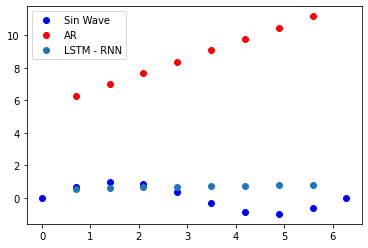

In [269]:
plt.plot(t,sin_wave,'o', label='Sin Wave', c='blue')
plt.plot(t[1:9],predictions_ar,'o', c='red', label='AR')
plt.plot(t[1:9], model_lstm.predict(train_input_nn), 'o', label='LSTM - RNN')
plt.legend()
plt.show()

This graph looks ok for the LSTM, but it seems the AutoRegression is much further.

In the next couple code blocks, I will change around the maxlag value for the AutoRegression in order to improve our results.

In [247]:
model_ar = AR(train_input_nn)
model_ar_fit = model_ar.fit(4)

# make predictions
predictions_ar = model_ar_fit.predict(start=8, end=15)

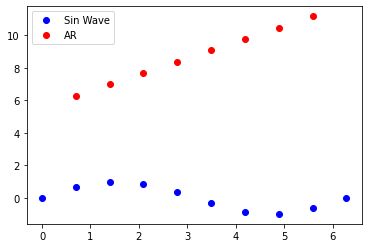

In [249]:
plt.plot(t,sin_wave,'o', label='Sin Wave', c='blue')
plt.plot(t[1:9],predictions_ar,'o', c='red', label='AR')
plt.legend()
plt.show()

In [250]:
model_ar = AR(train_input_nn)
model_ar_fit = model_ar.fit(3)

# make predictions
predictions_ar = model_ar_fit.predict(start=8, end=15)

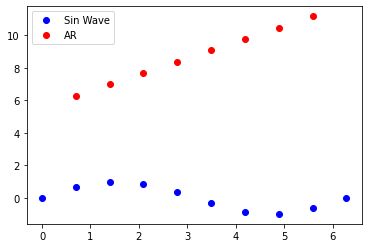

In [251]:
plt.plot(t,sin_wave,'o', label='Sin Wave', c='blue')
plt.plot(t[1:9],predictions_ar,'o', c='red', label='AR')
plt.legend()
plt.show()

# Shifted and Scaled Sin Wave

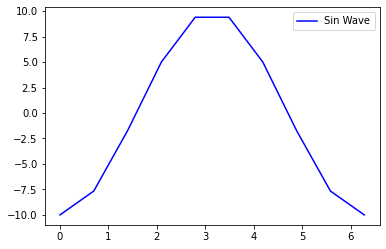

In [257]:
sin_wave = 10*np.sin(t-(np.pi/2))

plt.plot(t,sin_wave,'-', label='Sin Wave', c='blue')
plt.legend()
plt.show()

# Adding Noise to Sin Wave

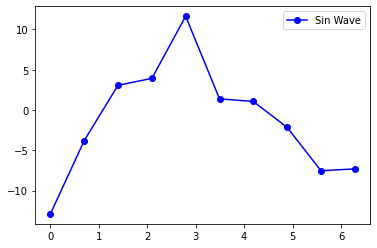

In [262]:
SNR = 3

# Signal power
signal_power = np.sum(sin_wave**2)/len(sin_wave)

# Noise power
n_pow = signal_power / SNR

# Generate random Gaussian noise
gauss_noise = np.random.randn(len(sin_wave))

# Scale the noise amplitude
noise = gauss_noise * np.sqrt(n_pow)

# Add noise to the signal
noisy_signal = sin_wave + noise


plt.plot(t,noisy_signal,'o-', label='Sin Wave', c='blue')
plt.legend()
plt.show()

Epoch 1/30
1/1 - 6s - loss: 0.2918 - 6s/epoch - 6s/step
Epoch 2/30
1/1 - 0s - loss: 0.2197 - 13ms/epoch - 13ms/step
Epoch 3/30
1/1 - 0s - loss: 0.1477 - 10ms/epoch - 10ms/step
Epoch 4/30
1/1 - 0s - loss: 0.0756 - 10ms/epoch - 10ms/step
Epoch 5/30
1/1 - 0s - loss: 0.0035 - 10ms/epoch - 10ms/step
Epoch 6/30
1/1 - 0s - loss: -6.8693e-02 - 11ms/epoch - 11ms/step
Epoch 7/30
1/1 - 0s - loss: -1.4097e-01 - 12ms/epoch - 12ms/step
Epoch 8/30
1/1 - 0s - loss: -2.1337e-01 - 11ms/epoch - 11ms/step
Epoch 9/30
1/1 - 0s - loss: -2.8591e-01 - 10ms/epoch - 10ms/step
Epoch 10/30
1/1 - 0s - loss: -3.5863e-01 - 13ms/epoch - 13ms/step
Epoch 11/30
1/1 - 0s - loss: -4.3156e-01 - 10ms/epoch - 10ms/step
Epoch 12/30
1/1 - 0s - loss: -5.0473e-01 - 11ms/epoch - 11ms/step
Epoch 13/30
1/1 - 0s - loss: -5.7817e-01 - 10ms/epoch - 10ms/step
Epoch 14/30
1/1 - 0s - loss: -6.5191e-01 - 10ms/epoch - 10ms/step
Epoch 15/30
1/1 - 0s - loss: -7.2600e-01 - 11ms/epoch - 11ms/step
Epoch 16/30
1/1 - 0s - loss: -8.0046e-01 - 12ms/

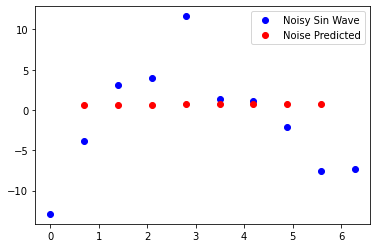

In [283]:
train_input_nn = np.array(train_input, dtype=float)
train_label_nn = np.array(train_input, dtype=float)
train_input_nn = train_input_nn.reshape((train_input_nn.shape[0], 1, 1))
train_label_nn = train_label_nn.reshape((train_label_nn.shape[0], 1, 1))

model_lstm = keras.Sequential()
model_lstm.add(layers.LSTM(128))
model_lstm.add(layers.Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam')

model_lstm.fit(train_input_nn, train_label_nn, epochs=30, verbose=2)

plt.plot(t,noisy_signal,'o', label='Noisy Sin Wave', c='blue')
plt.plot(t[1:9], model_lstm.predict(train_input_nn),'o',label='Noise Predicted', c='red')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


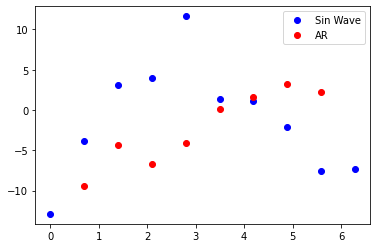

In [285]:
model_ar = AR(noisy_signal)
model_ar_fit = model_ar.fit(4)

# make predictions
predictions_ar = model_ar_fit.predict(start=8, end=15)

plt.plot(t,noisy_signal,'o', label='Sin Wave', c='blue')
plt.plot(t[1:9],predictions_ar,'o', c='red', label='AR')
plt.legend()
plt.show()

## Part 2

Load and Examine Data as created in Matlab (everything until the model was created)

In [318]:
x_train = pd.read_csv('/content/mat/XTrain.csv')
y_train = pd.read_csv('/content/mat/YTrain.csv')
x_test = pd.read_csv('/content/mat/XTest.csv')
y_test = pd.read_csv('/content/mat/YTest.csv')



In [319]:
print(x_train.head(10))

    519   619   723   827   914   956   955   934   920   900  ...  1142  \
0   -79   -79   -79   -77   -75   -72   -69   -65   -60   -55  ...  -423   
1  -390  -462  -542  -626  -695  -719  -708  -693  -680  -665  ...   104   
2 -1697 -2084 -2491 -2902 -3273 -3569 -3640 -3669 -3691 -3687  ...   -31   
3  -281  -334  -393  -445  -463  -448  -401  -323  -249  -163  ...   296   
4    17    19    21    22    24    25    26    26    26    25  ...  -152   
5   -23   -29   -38   -47   -56   -62   -66   -68   -71   -72  ...     6   
6  -123  -140  -152  -162  -170  -174  -171  -164  -155  -150  ...   -40   
7  -885 -1059 -1229 -1396 -1540 -1617 -1625 -1600 -1600 -1636  ...  -121   
8   485   579   681   786   874   913   922   928   934   942  ...     0   
9  -102  -136  -153  -161  -167  -173  -177  -180  -181  -182  ...    49   

   1144.2  1055  866.1  632  403  224.5  116.6  17.29  18.21  
0    -385  -340   -289 -238 -187   -138    -93    -57      0  
1      86    64     46   35   28     

Start building the model:

In [363]:
model = keras.Sequential()
model.add(layers.LSTM(100, input_shape=(1000, 1)))
model.add(layers.Dense(2,activation='sigmoid'))

ad_op = keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0)
# Compile the model
model.compile(optimizer=ad_op,loss='categorical_crossentropy')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=150)

Epoch 1/10


ValueError: ignored